# HR Dataset - Statistics Review
---
Timothy Helton

---
<br>
<font color="red">
    NOTE:
    <br>
    This notebook uses code found in the
    <a href="https://github.com/TimothyHelton/k2datascience/blob/master/k2datascience/hr_analytics.py">
    <strong>k2datascience.hr_analytics</strong></a> module.
    To execute all the cells do one of the following items:
    <ul>
        <li>Install the k2datascience package to the active Python interpreter.</li>
        <li>Add k2datascience/k2datascience to the PYTHON_PATH system variable.</li>
        <li>Create a link to the hr_analytics.py file in the same directory as this notebook.</li>
</font>

---
### Imports

In [1]:
from k2datascience import hr_analytics

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

---
### Load Data

In [2]:
hr = hr_analytics.HR()

---
## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference text.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as some categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [3]:
print(f'Data Shape\n\n{hr.data.shape}')
print('\n\nColumns\n\n{}'.format('\n'.join(hr.data.columns)))
hr.data.head()

Data Shape

(14999, 10)


Columns

satisfaction
evaluation
projects_qty
hours_avg
service_qty
accident
left
promotion_5yr
sales
salary


,satisfaction,evaluation,projects_qty,hours_avg,service_qty,accident,left,promotion_5yr,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


/Users/tim/working_python/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:1682: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


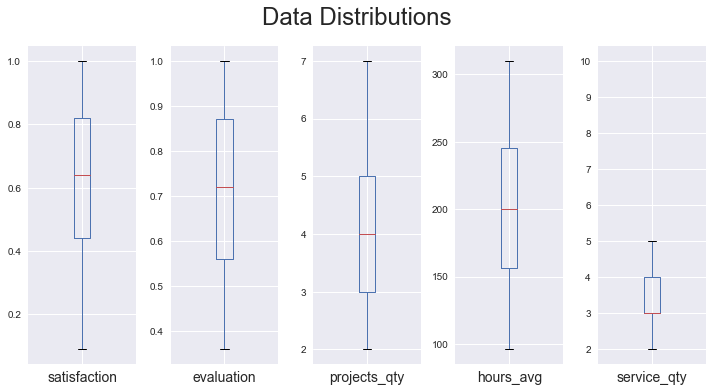

In [4]:
hr.box_plot();

---
## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing some of these concepts to see if we can find some interesting paths to go down which may provide some insight into the inner workings of this company.

- What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.

In [5]:
print(f'P(employee left the company) = {hr.p_left_company:.3f}')
print(f'P(employee experienced a work accident) = {hr.p_work_accident:.3f}')
print(f'P(employee experienced accident and left company) = {hr.p_left_and_accident:.3f}')

P(employee left the company) = 0.238
P(employee experienced a work accident) = 0.145
P(employee experienced accident and left company) = 0.011


- Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?

,ex_employees,current_employees,delta
0.25,0.13,0.54,0.41
0.50,0.41,0.69,0.28
0.90,0.84,0.94,0.1


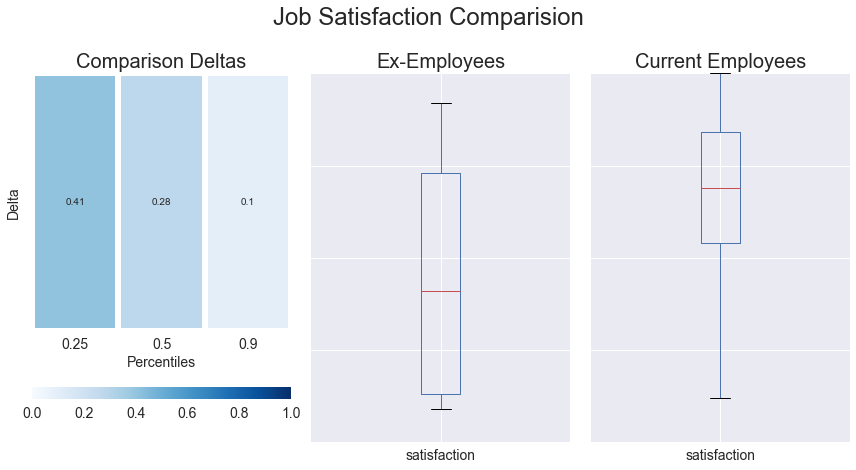

In [6]:
hr.compare_satisfaction()

#### Findings:
1. Employees who stayed are in general more satisfied with their position than the ones who chose to leave.
1. Job Satisfaction is not the identifying characteristic as to why employees are leaving.

- Compute the variance and standard deviation of hours worked.

In [7]:
hours_variance, hours_std = hr.calc_hours_stats()
print(f'Hours Worked Variance: {hours_variance:.3f}')
print(f'Hours Worked Standard Deviation: {hours_std:.3f}')

Hours Worked Variance: 2494.313
Hours Worked Standard Deviation: 49.943


- Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?

In [8]:
satisfaction_ex, satisfaction_current = hr.compare_satisfaction_variance()
print(f'Ex-Employee Job Satisfaction Variance: {satisfaction_ex:.3f}')
print(f'Current Employee Job Satisfaction Variance: {satisfaction_current:.3f}')

Ex-Employee Job Satisfaction Variance: 0.070
Current Employee Job Satisfaction Variance: 0.047


#### Findings
1. The spread of job satisfaction data is 48.9% greater for ex-employees vs. current employees.
    1. Job Satisfaction is not a good indicator of employee retention.

- Compute the mean satisfaction level for each salary category.  Comment on your results.

In [9]:
hr.calc_satisfaction_salary()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction, dtype: float64

#### Findings
1. Salary has a very weak contribution to job satisfaction.

- Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$

$$ P(a \vert b) = \frac{P(b \vert a) P(a)}{P(b)} $$

- What can you say about your results?

In [10]:
hr.calc_p_hours_salary()

Salaries,low,medium,high
hours_over_2_std,0.013532,0.008998,0.001617


#### Findings
1. The lower paid employees are putting in more hours than the higher paid employees.

- Repeat the previous question for the following case.

$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$

In [11]:
hr.calc_p_left_salary()

Salaries,low,medium,high
0,0.296884,0.204313,0.066289


#### Findings
1. The lowest paid employees are 4.5 times more likely to leave the company than the highest paid employees.

- What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.

In [12]:
hr.calc_p_salary_promotion()

,candidates,promoted,P_promotion
low,7316.000000,6446.000000,1237.000000
medium,66.000000,181.000000,72.000000
high,0.009021,0.028079,0.058205


#### Findings
1. Highier paid employees were 6.5 times more likely to be promoted than lower income employees.

- Suppose we were to pull 50 random samples of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.

In [13]:
print(f'Approximate Sample Satisfaction Mean: {hr.data.satisfaction.mean():.3f}')

Approximate Sample Satisfaction Mean: 0.613


In [14]:
sample_n = 10
sample_means = []
for n in range(sample_n):
    sample_means.append(hr.calc_satisfaction_random_sample(50))

sample_mean = '\n'.join([f'{x:.3f}' for x in sample_means])
print(f'Actual Sample Satisfaction Mean: {sum(sample_means) / sample_n}')
print('Actual Sample Satisfaction Values:')
print(f'{sample_mean}')

Actual Sample Satisfaction Mean: 0.6081800000000002
Actual Sample Satisfaction Values:
0.572
0.606
0.643
0.610
0.566
0.628
0.538
0.659
0.634
0.626


---
## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin clip or medical test giving a positive or negative result.  Typically we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by 
$$ P(X = x) = p^x (1 - p)^{1 - x} $$
Bernoulli random variables crop up very often statistical analysis most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain some insight.

Using the HR data, answer the following.
- Which variables in the HR data can be said to be Bernoulli random variables?

In [15]:
print('\n'.join(hr.bernoulli_vars))

accident
left
promotion_5yr


- For the k variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result.

In [16]:
hr.calc_p_bernoulli()

accident         0.144610
left             0.238083
promotion_5yr    0.021268
dtype: float64

- Compute the variance of each of the variables in part 2 using $p_k$ as described above.

In [17]:
hr.calc_bernoulli_variance()

accident         0.123706
left             0.181411
promotion_5yr    0.020817
dtype: float64

- For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.

In [18]:
hr.calc_p_bernoulli_k()

p_3500,accident,left,promotion_5yr
0,3.349453e-183,0.003037,0.0


#### Findings
1. The probability of any of the Bernoulli variables for this dataset producing exactly 3500 positive results is very low.

- For each of the k variables, compute the probability of randomly selecting at 3500 **or less** with a positive result.  Comment on your answer.

In [19]:
hr.calc_p_bernoulli_k(cumulative=True)

p_3500,accident,left,promotion_5yr
0,1.0,0.088031,1.0


#### Findings
1. The probability that more than 3500 employees will leave the company is not likely, but high turnover is predicted.

- Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

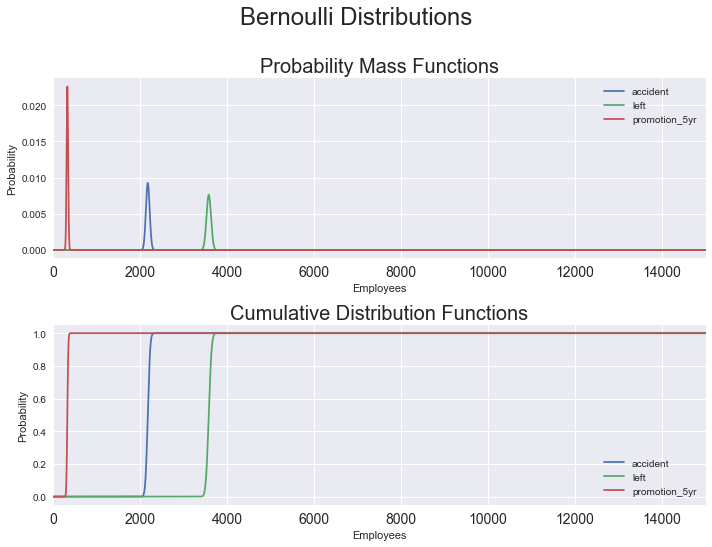

In [20]:
hr.bernoulli_plot()

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Guassian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, in can be shown that the means of random variables sampled from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine the some of the variables in the HR dataset and construct some normal approximating them.

Using the HR data, answer the following

- Which variables may be approximately normal?

In [21]:
print('\n'.join(hr.normal_vars))

satisfaction
evaluation
hours_avg


- For the variables in part 1, plot some histograms.


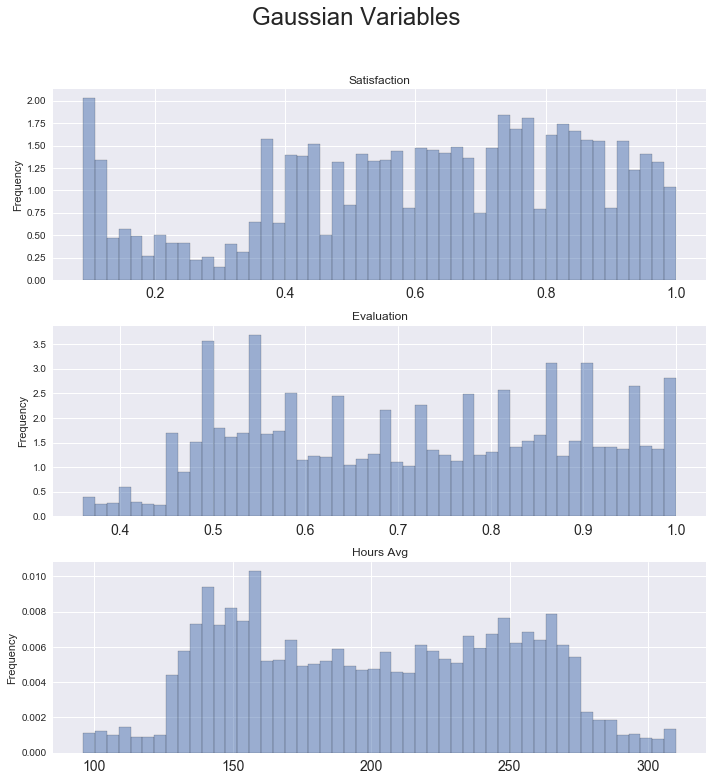

In [22]:
hr.gaussian_plot()

- Compute the mean and variance for each of the variables used in parts 1 and 2.

In [23]:
hr.norm_stats

,satisfaction,evaluation,hours_avg
mean,0.612834,0.716102,201.050337
variance,0.061817,0.029299,2494.313175


- Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

0.6128335222348166
0.2486306510611418



0.7161017401159978
0.17116911062327592



201.0503366891126
49.943099371284305





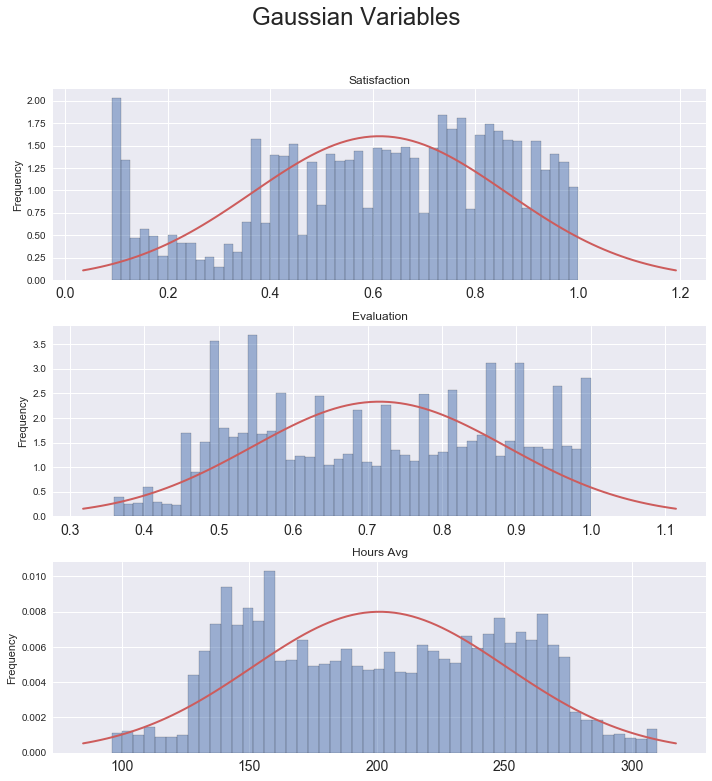

In [24]:
hr.gaussian_plot(normal_overlay=True)

#### Findings
1. None of the assumed Gaussian Variables strongly resemble a Gaussian distribution for the entire set.

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts, such as, the amount of clicks per advertisement and arriving flights per unit time.  It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

- What variables would be good candidates for modeling with a Poisson distribution?

    - projects_qty
    - hours_avg
    - service_qty

- For each variable in part 1, divide each by salary and fit a Poisson distribution to each.

- Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2.  Comment on your results.

### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \approx N(\mu, \sigma^2/n) = \frac{\bar{X_n} - \mu}{\sigma \sqrt{n}}$$
In this exercise, you'll conduct some simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
1. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
1. Plot a histogram for each variable used in part 2.  Comment on your results.
1. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
1. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

---
## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what exactly are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypothesis are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05 and is often called a "P-value".  If a test produces a P-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise you'll explore the HR data more and test some hypothesis.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
1. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)
1. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
1. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
1. How would you interpret your results in part 5?
1. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
1. Repeat parts 4-6 on a hypothesis of your choosing.
1. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

---
## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute some statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations

In this exercise you will implement this algorithm on the HR data.

Write a function that can perform boostrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.